<a href="https://colab.research.google.com/github/aditi-2024/Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 164MB/s]
100% 163M/163M [00:01<00:00, 160MB/s]


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1793.jpg', 'with_mask_2638.jpg', 'with_mask_3534.jpg', 'with_mask_133.jpg', 'with_mask_1617.jpg']
['with_mask_1674.jpg', 'with_mask_3597.jpg', 'with_mask_799.jpg', 'with_mask_3286.jpg', 'with_mask_1491.jpg']


In [7]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_121.jpg', 'without_mask_301.jpg', 'without_mask_3122.jpg', 'without_mask_3316.jpg', 'without_mask_2878.jpg']
['without_mask_3129.jpg', 'without_mask_3641.jpg', 'without_mask_2139.jpg', 'without_mask_174.jpg', 'without_mask_1651.jpg']


In [8]:
#counting the number of elements present in with_mask list and without_mask_list
print('Number of masked images:',len(with_mask_files))
print('Number of not masked images:',len(without_mask_files))

Number of masked images: 3725
Number of not masked images: 3828


**Creating Labels for the two class of images**

Label Encoding:
with mask-->1
without mask-->0

In [9]:
#create the labels
with_mask_labels=[1]*3725

without_mask_labels=[0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [10]:
#combining the two list
labels=with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

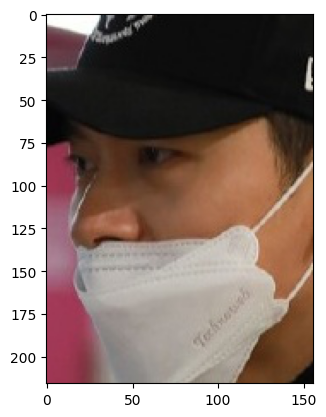

In [11]:
#display with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_583.jpg')
imgplot=plt.imshow(img)
plt.show()

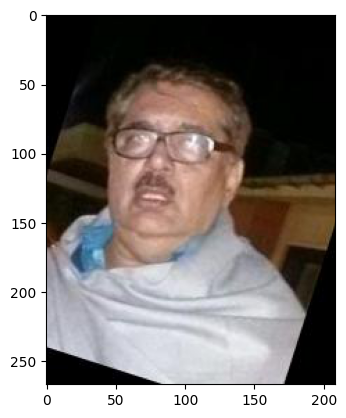

In [ ]:
#display without mask image
img=mpimg.imread('/content/data/without_mask/without_mask_1383.jpg')
imgplot=plt.imshow(img)
plt.show()

**Image Processing**

1->Resize the images
2->convert images into numpy arrays

In [12]:
#convert images to numpy array
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:

  image= Image.open(with_mask_path + img_file)
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:

  image= Image.open(without_mask_path + img_file)
  image= image.resize((128,128))
  image= image.convert('RGB')
  image= np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [13]:
#converting image list and label list to numy array
X=np.array(data)
Y=np.array(labels)

**Train Test Split**

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [15]:
print(X.shape,X_train.shape,X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [16]:
#scaling the data
X_train_scaled=X_train/255

X_test_scaled=X_test/255

In [19]:
X_train_scaled[0]

array([[[0.09411765, 0.05490196, 0.0627451 ],
        [0.08627451, 0.05490196, 0.05882353],
        [0.08627451, 0.0627451 , 0.0627451 ],
        ...,
        [0.15294118, 0.11372549, 0.10588235],
        [0.12941176, 0.09803922, 0.09019608],
        [0.17647059, 0.14117647, 0.14117647]],

       [[0.09411765, 0.07058824, 0.06666667],
        [0.08627451, 0.06666667, 0.0627451 ],
        [0.0745098 , 0.06666667, 0.05882353],
        ...,
        [0.13333333, 0.09411765, 0.07843137],
        [0.13333333, 0.10196078, 0.09019608],
        [0.1372549 , 0.10588235, 0.09803922]],

       [[0.07843137, 0.08235294, 0.0627451 ],
        [0.0745098 , 0.07843137, 0.0627451 ],
        [0.0627451 , 0.06666667, 0.05490196],
        ...,
        [0.12156863, 0.08627451, 0.06666667],
        [0.12941176, 0.10196078, 0.07843137],
        [0.12941176, 0.09803922, 0.08235294]],

       ...,

       [[0.63529412, 0.6745098 , 0.65490196],
        [0.60392157, 0.64313725, 0.61960784],
        [0.75686275, 0

**Building a convolutional neural network**

In [20]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes=2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

In [25]:
#compile the neural network
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['acc'])

In [26]:
#training a neural network
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.4441 - acc: 0.8199 - val_loss: 0.2608 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2748 - acc: 0.8876 - val_loss: 0.2313 - val_acc: 0.8959
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2356 - acc: 0.9062 - val_loss: 0.2321 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1874 - acc: 0.9266 - val_loss: 0.2347 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1567 - acc: 0.9391 - val_loss: 0.2805 - val_acc: 0.9140


**Model Evaluation**

In [27]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Acuuracy=',accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2581 - acc: 0.9186
Test Acuuracy= 0.9185969829559326


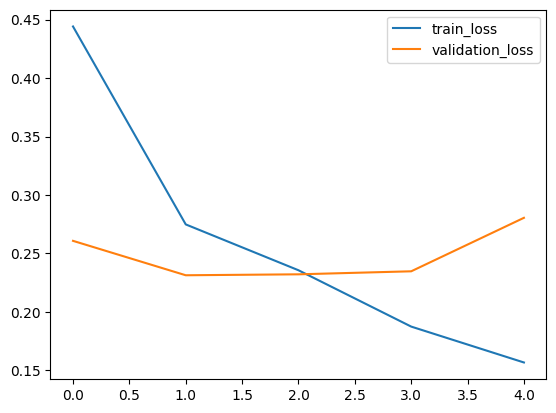

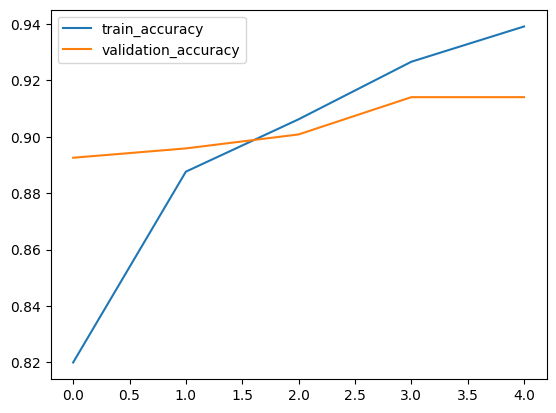

In [28]:
h=history

#plot the loss value

plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()


#plot the accuracy value

plt.plot(h.history['acc'],label='train_accuracy')
plt.plot(h.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path=input('Path of the image to be predicted')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print('The person is wearing a mask')
else:
  print('The person is not wearing a mask')